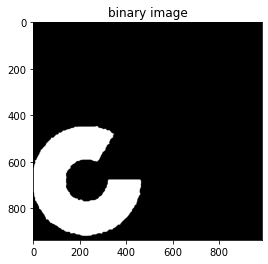

1
1


In [1]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

img16 = cv.imread("../Images/img16.png")
img16gray = cv.cvtColor(img16, cv.COLOR_BGR2GRAY)
#故意调整下限阈值，只留下一个轮廓
ret, thresh = cv.threshold(img16gray, 100, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh,'gray'),plt.title("binary image")
plt.show()
print(len(contours))
print(len(hierarchy))

In [2]:
#长宽比：Width/Height
cnt = contours[0]
x,y,w,h = cv.boundingRect(cnt)
value = aspect_ratio = float(w)/h
print(value)

0.9851380042462845


In [3]:
#范围:  Object Area / Bounding Rectangle Area
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w * h
extent = float(area)/rect_area
print(extent)

0.5588600007321181


In [4]:
#坚实度： contour Area / conver Hull Area 
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.7249580792117408


In [5]:
#等效直径
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

394.3447076049094


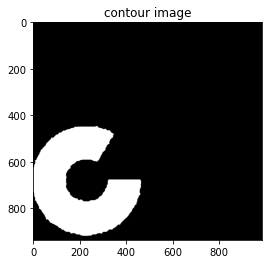

In [6]:
#取向
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
#掩码和像素点
mask = np.zeros(img16gray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
plt.imshow(mask,'gray'),plt.title("contour image")
plt.show()
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)
#Numpy: (行，列）， OpenCV：(x,y)   row = x, column = y。

In [7]:
#最大值，最小值和它们的位置
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img16gray,mask = mask)
print(min_val,max_val, min_loc, max_loc)

101.0 160.0 (181, 449) (94, 498)


In [8]:
#平均颜色或平均强度
mean_val = cv.mean(img16,mask = mask)
print(mean_val)

(6.4674558616823346, 248.13241901542912, 5.186636225513695, 0.0)


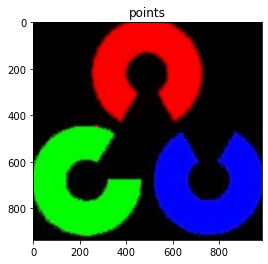

In [9]:
#极端点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

point_size = 1
point_color = (255, 0, 0) # RGB
thickness = 8 # 可以为 0 、4、8
points = [leftmost, rightmost, topmost, bottommost] 
for i in range(4):
    cv.circle(img16, points[i], point_size, point_color, thickness)
plt.imshow(img16),plt.title("points")
plt.show()